In [ ]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

###Import Data kendaraan train dan kendaraan test

In [ ]:
#import kendaraan train
datatrainid = pd.read_csv("https://raw.githubusercontent.com/mugeki/ml-classification/main/kendaraan_train.csv")
datatrain = datatrainid.drop(["id"], axis=1)
datatrain

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [ ]:
#import kendaraan test
datatest = pd.read_csv("https://raw.githubusercontent.com/mugeki/ml-classification/main/kendaraan_test.csv")
datatest

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,61,1,46,0,> 2 Tahun,Pernah,31039,124,67,0
47635,Pria,41,1,15,0,1-2 Tahun,Pernah,2630,157,232,0
47636,Pria,24,1,29,1,< 1 Tahun,Tidak,33101,152,211,0
47637,Pria,59,1,30,0,1-2 Tahun,Pernah,37788,26,239,1


###Cek dan isi data kosong

In [ ]:
#Cek data kosong test
datatest.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [ ]:
#Cek data kosong train
datatrain.isnull().sum()

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [ ]:
#Replace data kosong dengan mean & mode
datatrain["Jenis_Kelamin"] = datatrain["Jenis_Kelamin"].replace(np.NaN, datatrain["Jenis_Kelamin"].mode()[0])
datatrain["Umur"] = datatrain["Umur"].replace(np.NaN, datatrain["Umur"].mean())
datatrain["SIM"] = datatrain["SIM"].replace(np.NaN, datatrain["SIM"].mode()[0])
datatrain["Kode_Daerah"] = datatrain["Kode_Daerah"].replace(np.NaN, datatrain["Kode_Daerah"].mode()[0])
datatrain["Sudah_Asuransi"] = datatrain["Sudah_Asuransi"].replace(np.NaN, datatrain["Sudah_Asuransi"].mode()[0])
datatrain["Umur_Kendaraan"] = datatrain["Umur_Kendaraan"].replace(np.NaN, datatrain["Umur_Kendaraan"].mode()[0])
datatrain["Kendaraan_Rusak"] = datatrain["Kendaraan_Rusak"].replace(np.NaN, datatrain["Kendaraan_Rusak"].mode()[0])
datatrain["Premi"] = datatrain["Premi"].replace(np.NaN, datatrain["Premi"].mean())
datatrain["Kanal_Penjualan"] = datatrain["Kanal_Penjualan"].replace(np.NaN, datatrain["Kanal_Penjualan"].mode()[0])
datatrain["Lama_Berlangganan"] = datatrain["Lama_Berlangganan"].replace(np.NaN, datatrain["Lama_Berlangganan"].mean())
datatrain.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,Pria,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,Pernah,34857.0,88.0,194.0,0


###Handle data categorical

In [ ]:
# Kendaraan Train
# Kolom Jenis_Kelamin
col = "Jenis_Kelamin"
condlist = [datatrain[col].str.contains("Wanita"), datatrain[col].str.contains("Pria")]
choicelist = [0, 1]
datatrain[col] = np.select(condlist, choicelist)

# Kolom Umur_Kendaraan
col = "Umur_Kendaraan"
condlist = [datatrain[col].str.contains("< 1 Tahun"), datatrain[col].str.contains("1-2 Tahun"), datatrain[col].str.contains("> 2 Tahun")]
choicelist = [0, 1, 2]
datatrain[col] = np.select(condlist, choicelist)

# Kolom Kendaraan_Rusak
col = "Kendaraan_Rusak"
condlist = [datatrain[col].str.contains("Tidak"), datatrain[col].str.contains("Pernah")]
choicelist = [0, 1]
datatrain[col] = np.select(condlist, choicelist)

datatrain.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,30.0,1.0,33.0,1.0,0,0,28029.0,152.0,97.0,0
1,1,48.0,1.0,39.0,0.0,2,1,25800.0,29.0,158.0,0
2,1,21.0,1.0,46.0,1.0,0,0,32733.0,160.0,119.0,0
3,0,58.0,1.0,48.0,0.0,1,0,2630.0,124.0,63.0,0
4,1,50.0,1.0,35.0,0.0,2,1,34857.0,88.0,194.0,0


In [ ]:
# Kendaraan Test
# Kolom Jenis_Kelamin
col = "Jenis_Kelamin"
condlist = [datatest[col].str.contains("Wanita"), datatest[col].str.contains("Pria")]
choicelist = [0, 1]
datatest[col] = np.select(condlist, choicelist)

# Kolom Umur_Kendaraan
col = "Umur_Kendaraan"
condlist = [datatest[col].str.contains("< 1 Tahun"), datatest[col].str.contains("1-2 Tahun"), datatest[col].str.contains("> 2 Tahun")]
choicelist = [0, 1, 2]
datatest[col] = np.select(condlist, choicelist)

# Kolom Kendaraan_Rusak
col = "Kendaraan_Rusak"
condlist = [datatest[col].str.contains("Tidak"), datatest[col].str.contains("Pernah")]
choicelist = [0, 1]
datatest[col] = np.select(condlist, choicelist)

datatest.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,49,1,8,0,1,1,46963,26,145,0
1,1,22,1,47,1,0,0,39624,152,241,0
2,1,24,1,28,1,0,0,110479,152,62,0
3,1,46,1,8,1,1,0,36266,124,34,0
4,1,35,1,23,0,1,1,26963,152,229,0


###Menentukan Viariabel Independen dan Dependen

In [ ]:
#Menentukan variabel independen train
x_train = datatrain.drop(["Tertarik"], axis=1)
x_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0,30.0,1.0,33.0,1.0,0,0,28029.0,152.0,97.0
1,1,48.0,1.0,39.0,0.0,2,1,25800.0,29.0,158.0
2,1,21.0,1.0,46.0,1.0,0,0,32733.0,160.0,119.0
3,0,58.0,1.0,48.0,0.0,1,0,2630.0,124.0,63.0
4,1,50.0,1.0,35.0,0.0,2,1,34857.0,88.0,194.0


In [ ]:
#Menentukan variabel independen test
x_test = datatest.drop(["Tertarik"], axis=1)
x_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0,49,1,8,0,1,1,46963,26,145
1,1,22,1,47,1,0,0,39624,152,241
2,1,24,1,28,1,0,0,110479,152,62
3,1,46,1,8,1,1,0,36266,124,34
4,1,35,1,23,0,1,1,26963,152,229


In [ ]:
#Menentukan variabel dependen train
y_train = datatrain["Tertarik"]
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: Tertarik, dtype: int64

In [ ]:
#Menentukan variabel dependen test
y_test = datatest["Tertarik"]
y_test.head()

0    0
1    0
2    0
3    0
4    0
Name: Tertarik, dtype: int64

###Menentukan nilai k terbaik

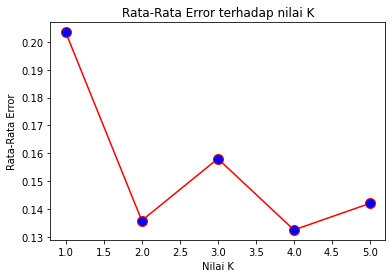

In [ ]:
error = []

for i in range(1, 6):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)

    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

plt.figure()
plt.plot(range(1, 6), error, color='red', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Rata-Rata Error terhadap nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Rata-Rata Error')
plt.show()

###KNN

In [ ]:
# Fungsi Clasification KNN
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
#Menentukan prediksi
y_pred = knn.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Menentukan probabilitas prediksi
knn.predict_proba(x_test)

array([[0.75, 0.25],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [0.5 , 0.5 ],
       [0.75, 0.25]])

In [ ]:
# Menampilkan Matrix hasil prediksi
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))


Confusion Matrix
[[41171   607]
 [ 5706   155]]


In [ ]:
# Ketepatan Hasil Prediksi
print('Clasification Report')
print(classification_report(y_test, y_pred))

Clasification Report
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     41778
           1       0.20      0.03      0.05      5861

    accuracy                           0.87     47639
   macro avg       0.54      0.51      0.49     47639
weighted avg       0.80      0.87      0.82     47639



## Eksperimen

In [ ]:
# Cek distribusi class
print(Counter(y_train))

Counter({0: 250825, 1: 35006})


### Oversampling

In [ ]:
over_sampler = RandomOverSampler()
x_over, y_over = over_sampler.fit_resample(x_train, y_train)
print(Counter(y_over))

Counter({0: 250825, 1: 250825})


In [ ]:
knn.fit(x_over, y_over)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
#Menentukan prediksi
y_pred = knn.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
#Menentukan probabilitas prediksi
knn.predict_proba(x_test)

array([[0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [0.25, 0.75],
       [0.5 , 0.5 ]])

In [ ]:
# Menampilkan Matrix hasil prediksi
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))


Confusion Matrix
[[32944  8834]
 [ 3955  1906]]


In [ ]:
# Ketepatan Hasil Prediksi
print('Clasification Report')
print(classification_report(y_test, y_pred))

Clasification Report
              precision    recall  f1-score   support

           0       0.89      0.79      0.84     41778
           1       0.18      0.33      0.23      5861

    accuracy                           0.73     47639
   macro avg       0.54      0.56      0.53     47639
weighted avg       0.80      0.73      0.76     47639



### Undersampling

In [ ]:
under_sampler = RandomUnderSampler()
x_under, y_under = under_sampler.fit_resample(x_train, y_train)
print(Counter(y_under))

Counter({0: 35006, 1: 35006})


In [ ]:
knn.fit(x_under, y_under)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
#Menentukan prediksi
y_pred = knn.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
#Menentukan probabilitas prediksi
knn.predict_proba(x_test)

array([[0.25, 0.75],
       [0.75, 0.25],
       [0.75, 0.25],
       ...,
       [0.75, 0.25],
       [0.  , 1.  ],
       [0.25, 0.75]])

In [ ]:
# Menampilkan Matrix hasil prediksi
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))


Confusion Matrix
[[29506 12272]
 [ 3336  2525]]


In [ ]:
# Ketepatan Hasil Prediksi
print('Clasification Report')
print(classification_report(y_test, y_pred))

Clasification Report
              precision    recall  f1-score   support

           0       0.90      0.71      0.79     41778
           1       0.17      0.43      0.24      5861

    accuracy                           0.67     47639
   macro avg       0.53      0.57      0.52     47639
weighted avg       0.81      0.67      0.72     47639

